# FX Volatility Surfaces - Layouts

This notebook demonstrates how to access and use the functionalities of **FX Volatility Surfaces** within the **LSEG Financial Analytics SDK**. 

FX volatility surfaces provide implied volatility data across different deltas/strikes and maturities for fx options. This enables quantitative analysis, risk management, and derivatives pricing for fx markets.

**You will be able to:**
- Configure and request volatility surface data

## Imports

Import the following necessary modules:
- `lseg_analytics.market_data.fx_volatility` - for FX volatility surfaces construction

In [1]:
from lseg_analytics.market_data import fx_volatility as fxv

import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

## Data Preparation

Volatility surface preparation follows a structured 3-step process:

**Process Overview:**
1. **Surface Definition** - Specify the underlying instrument (fx pair)
2. **Surface Parameters** - Configure volatility model and calculation settings
3. **Request Creation** - Combine definition and parameters into a request object  

Each step builds upon the previous, creating a complete request specification for the volatility surface engine.

## FX Volatility Surface

In [2]:
print("Step 1: Creating Surface Definition...")

currencyPair = "EURUSD"

# Create surface definition object
surface_definition = fxv.FxVolatilitySurfaceDefinition(
        instrument_code = currencyPair
        )
print(f"   ✓ Instrument: {surface_definition.instrument_code}")

print("Step 2: Configuring Surface Parameters...")
surface_parameters = fxv.FxVolatilityPricingParameters(
        calculation_date = dt.datetime.strptime("2025-01-18", "%Y-%m-%d"),
        volatility_model = fxv.CurvesAndSurfacesVolatilityModelEnum.SVI,  # Options: SVI, SABR, TWIN_LOGNORMAL
        price_side = fxv.CurvesAndSurfacesPriceSideEnum.MID,              # Options: BID, MID, ASK
        x_axis = fxv.XAxisEnum.DELTA,                                     # Options: DATE, DELTA, MONEYNESS, STRIKE, TENOR
        y_axis = fxv.YAxisEnum.TENOR                                      # Options: same as X-axis
    )
print(f"   ✓ Surface Parameters: {surface_parameters}")


print("Step 3: Create request item...")
# Create the main request object  with basic configuration
request_item = fxv.FxVolatilitySurfaceRequestItem(
        surface_tag = f"{currencyPair}_Volsurface",
        underlying_definition = surface_definition,
        surface_parameters = surface_parameters,
        underlying_type = fxv.CurvesAndSurfacesUnderlyingTypeEnum.FX,
        surface_layout = fxv.SurfaceOutput(
            format = fxv.FormatEnum.MATRIX,  # Options: LIST, MATRIX
        )
    )
print(f"   ✓ Request Item: {request_item}")

Step 1: Creating Surface Definition...
   ✓ Instrument: EURUSD
Step 2: Configuring Surface Parameters...
   ✓ Surface Parameters: {'calculationDate': '2025-01-18T00:00:00Z', 'volatilityModel': 'SVI', 'priceSide': 'Mid', 'xAxis': 'Delta', 'yAxis': 'Tenor'}
Step 3: Create request item...
   ✓ Request Item: {'surfaceTag': 'EURUSD_Volsurface', 'underlyingDefinition': {'instrumentCode': 'EURUSD'}, 'surfaceParameters': {'calculationDate': '2025-01-18T00:00:00Z', 'volatilityModel': 'SVI', 'priceSide': 'Mid', 'xAxis': 'Delta', 'yAxis': 'Tenor'}, 'underlyingType': 'Fx', 'surfaceLayout': {'format': 'Matrix'}}


In [3]:
# Execute the calculation using the calculate function
# The 'universe' parameter accepts a list of request items for batch processing
try:
    response = fxv.calculate(universe=[request_item])

    # Display response structure information
    surface_data = response['data'][0]
    if 'surface' in surface_data:
        print(f"   Calculation successful!")
        print(f"   Surface data points available: {len(surface_data['surface'])}")
    else:
        print("   No surface data found in response")
    
except Exception as e:
    print(f"   Calculation failed: {str(e)}")
    raise

   Calculation successful!
   Surface data points available: 18


## Results Display

In [4]:
vol_surface = response['data'][0]['surface']
expiries = vol_surface[0][1:]
deltas = []
values = []
for row in vol_surface[1:]:
    deltas.append(row[0])
    values.append(row[1:])

surface_df = pd.DataFrame(values, index=deltas, columns=expiries).T
display(surface_df.astype(float).round(2))

-0.1  -0.15   -0.2  -0.25   -0.3  -0.35   -0.4  -0.45    ATM   0.45  \
ON    5.64   5.58   5.54   5.51   5.48   5.45   5.44   5.43   5.44   5.47   
SW   11.80  11.48  11.24  11.05  10.90  10.77  10.67  10.58  10.52  10.47   
2W   11.57  11.20  10.95  10.75  10.60  10.48  10.37  10.29  10.22  10.16   
1M   10.23   9.88   9.64   9.45   9.29   9.16   9.05   8.96   8.89   8.83   
2M    9.96   9.58   9.31   9.08   8.90   8.75   8.62   8.51   8.42   8.35   
3M    9.86   9.50   9.23   9.01   8.81   8.64   8.49   8.35   8.24   8.15   
6M   10.00   9.54   9.19   8.91   8.66   8.45   8.26   8.09   7.96   7.85   
9M   10.46   9.84   9.39   9.02   8.72   8.47   8.25   8.06   7.94   7.83   
1Y   10.62   9.93   9.42   9.03   8.71   8.44   8.21   8.02   7.89   7.78   
2Y   10.85  10.12   9.59   9.19   8.86   8.59   8.37   8.18   8.03   7.89   
3Y   10.95  10.24   9.73   9.34   9.03   8.77   8.55   8.38   8.23   8.10   
5Y   11.06  10.37   9.88   9.51   9.21   8.97   8.77   8.61   8.47   8.36   
7Y   11.25  10.58  10.07   9.64   9.28   8.96   8.68   8.46   8.64   8.85   
10Y  11.26  10.71  10.30   9.97   9.69   9.45   9.25   9.07   8.91   8.78   

       0.4   0.35    0.3   0.25    0.2   0.15    0.1  
ON    5.52   5.57   5.63   5.71   5.79   5.89   6.02  
SW   10.43  10.41  10.40  10.40  10.42  10.45  10.50  
2W   10.12  10.08  10.06  10.04  10.05  10.07  10.12  
1M    8.78   8.74   8.71   8.69   8.69   8.70   8.73  
2M    8.28   8.23   8.19   8.16   8.14   8.12   8.12  
3M    8.06   7.99   7.94   7.91   7.88   7.86   7.84  
6M    7.74   7.65   7.58   7.53   7.49   7.46   7.43  
9M    7.71   7.62   7.55   7.50   7.46   7.43   7.42  
1Y    7.66   7.56   7.48   7.43   7.40   7.41   7.45  
2Y    7.79   7.70   7.63   7.59   7.56   7.57   7.61  
3Y    8.00   7.92   7.86   7.82   7.81   7.82   7.87  
5Y    8.28   8.21   8.17   8.14   8.15   8.18   8.26  
7Y    8.59   8.40   8.29   8.25   8.27   8.33   8.42  
10Y   8.67   8.58   8.52   8.49   8.48   8.52   8.61

### Volatility Smile - Delta

Text(0, 0.5, 'Volatility')

<Figure size 640x480 with 0 Axes>

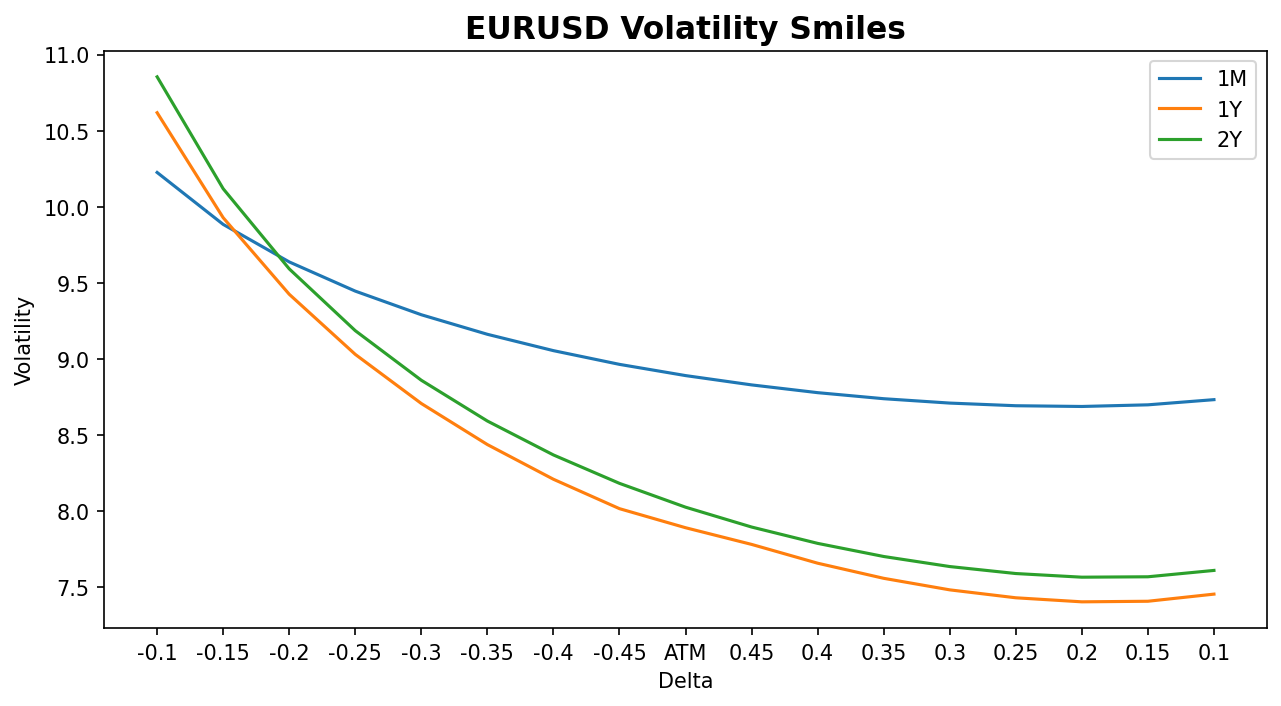

In [5]:
plt.figure()
plt.figure(figsize=(10, 5), dpi=150)
for tenor in ["1M", "1Y", "2Y"]:
    plt.plot(surface_df.columns.map(str), surface_df.T[tenor], label = tenor)
plt.title(f"{currencyPair} Volatility Smiles", fontdict={'fontweight':'bold','fontsize':15})
plt.legend(loc='upper right')
plt.xlabel('Delta')
plt.ylabel('Volatility')

## FX Volatility Surface

In [6]:
# Change X axis to use STRIKE
surface_parameters.x_axis = fxv.XAxisEnum.STRIKE
# Change Y axis to use DATE
surface_parameters.y_axis = fxv.YAxisEnum.DATE

In [7]:
# Execute the calculation using the calculate function
# The 'universe' parameter accepts a list of request items for batch processing
try:
    response = fxv.calculate(universe=[request_item])

    # Display response structure information
    surface_data = response['data'][0]
    if 'surface' in surface_data:
        print(f"   Calculation successful!")
        print(f"   Surface data points available: {len(surface_data['surface'])}")
    else:
        print("   No surface data found in response")
    
except Exception as e:
    print(f"   Calculation failed: {str(e)}")
    raise

   Calculation successful!
   Surface data points available: 18


In [8]:
vol_surface = response['data'][0]['surface']
expiries = vol_surface[0][1:]
strikes = []
values = []
for row in vol_surface[1:]:
    strikes.append(row[0])
    values.append(row[1:])

strikes = [round(float(strike), 5) if isinstance(strike, (int, float)) else strike for strike in strikes]

surface_df = pd.DataFrame(values, index=strikes, columns=expiries).T
display(surface_df.astype(float).round(2))

0.97605  0.98219  0.98833  0.99446  1.00060  1.00674  \
2025-01-20T00:00:00Z     7.75     7.50     7.23     6.96     6.68     6.39   
2025-01-27T00:00:00Z    13.54    13.16    12.77    12.38    11.98    11.59   
2025-02-03T00:00:00Z    12.77    12.41    12.04    11.68    11.34    11.02   
2025-02-19T00:00:00Z    10.79    10.53    10.28    10.03     9.78     9.55   
2025-03-19T00:00:00Z    10.04     9.84     9.63     9.43     9.23     9.04   
2025-04-16T00:00:00Z     9.71     9.55     9.38     9.22     9.05     8.89   
2025-07-17T00:00:00Z     9.39     9.24     9.09     8.95     8.80     8.66   
2025-10-17T00:00:00Z     9.42     9.27     9.13     8.98     8.84     8.70   
2026-01-19T00:00:00Z     9.36     9.23     9.09     8.96     8.83     8.70   
2027-01-19T00:00:00Z     9.37     9.27     9.17     9.08     8.98     8.89   
2028-01-19T00:00:00Z     9.51     9.43     9.36     9.28     9.21     9.14   
2030-01-18T00:00:00Z     9.73     9.68     9.62     9.56     9.51     9.45   
2032-01-19T00:00:00Z    10.31    10.26    10.21    10.16    10.11    10.06   
2035-01-18T00:00:00Z    10.33    10.30    10.26    10.23    10.19    10.16   

                      1.01288  1.01902  1.02515  1.03129  1.03743  1.04357  \
2025-01-20T00:00:00Z     6.09     5.78     5.47     5.83     6.46     7.03   
2025-01-27T00:00:00Z    11.21    10.86    10.59    10.44    10.40    10.43   
2025-02-03T00:00:00Z    10.73    10.49    10.29    10.15    10.07    10.04   
2025-02-19T00:00:00Z     9.33     9.14     8.97     8.84     8.76     8.71   
2025-03-19T00:00:00Z     8.85     8.68     8.53     8.40     8.31     8.23   
2025-04-16T00:00:00Z     8.72     8.56     8.41     8.27     8.14     8.04   
2025-07-17T00:00:00Z     8.51     8.37     8.24     8.10     7.98     7.87   
2025-10-17T00:00:00Z     8.56     8.43     8.30     8.17     8.06     7.95   
2026-01-19T00:00:00Z     8.57     8.45     8.33     8.22     8.11     8.01   
2027-01-19T00:00:00Z     8.80     8.71     8.63     8.54     8.46     8.39   
2028-01-19T00:00:00Z     9.06     8.99     8.93     8.86     8.79     8.73   
2030-01-18T00:00:00Z     9.40     9.35     9.30     9.25     9.20     9.15   
2032-01-19T00:00:00Z    10.01     9.96     9.91     9.87     9.82     9.77   
2035-01-18T00:00:00Z    10.12    10.09    10.06    10.02     9.99     9.96   

                      1.04971  1.05584  1.06198  1.06812  1.07426  
2025-01-20T00:00:00Z     7.56     8.05     8.52     8.95     9.36  
2025-01-27T00:00:00Z    10.50    10.60    10.71    10.82    10.94  
2025-02-03T00:00:00Z    10.06    10.11    10.20    10.30    10.42  
2025-02-19T00:00:00Z     8.69     8.69     8.72     8.76     8.81  
2025-03-19T00:00:00Z     8.18     8.15     8.13     8.12     8.12  
2025-04-16T00:00:00Z     7.97     7.93     7.90     7.87     7.86  
2025-07-17T00:00:00Z     7.77     7.69     7.63     7.58     7.54  
2025-10-17T00:00:00Z     7.86     7.77     7.70     7.64     7.59  
2026-01-19T00:00:00Z     7.91     7.82     7.74     7.67     7.61  
2027-01-19T00:00:00Z     8.31     8.24     8.17     8.11     8.05  
2028-01-19T00:00:00Z     8.67     8.61     8.55     8.49     8.44  
2030-01-18T00:00:00Z     9.10     9.05     9.01     8.96     8.92  
2032-01-19T00:00:00Z     9.72     9.67     9.63     9.58     9.53  
2035-01-18T00:00:00Z     9.92     9.89     9.86     9.83     9.79

### Volatility Smiles by Expiry: first four expiry dates

Text(0, 0.5, 'Volatility')

<Figure size 640x480 with 0 Axes>

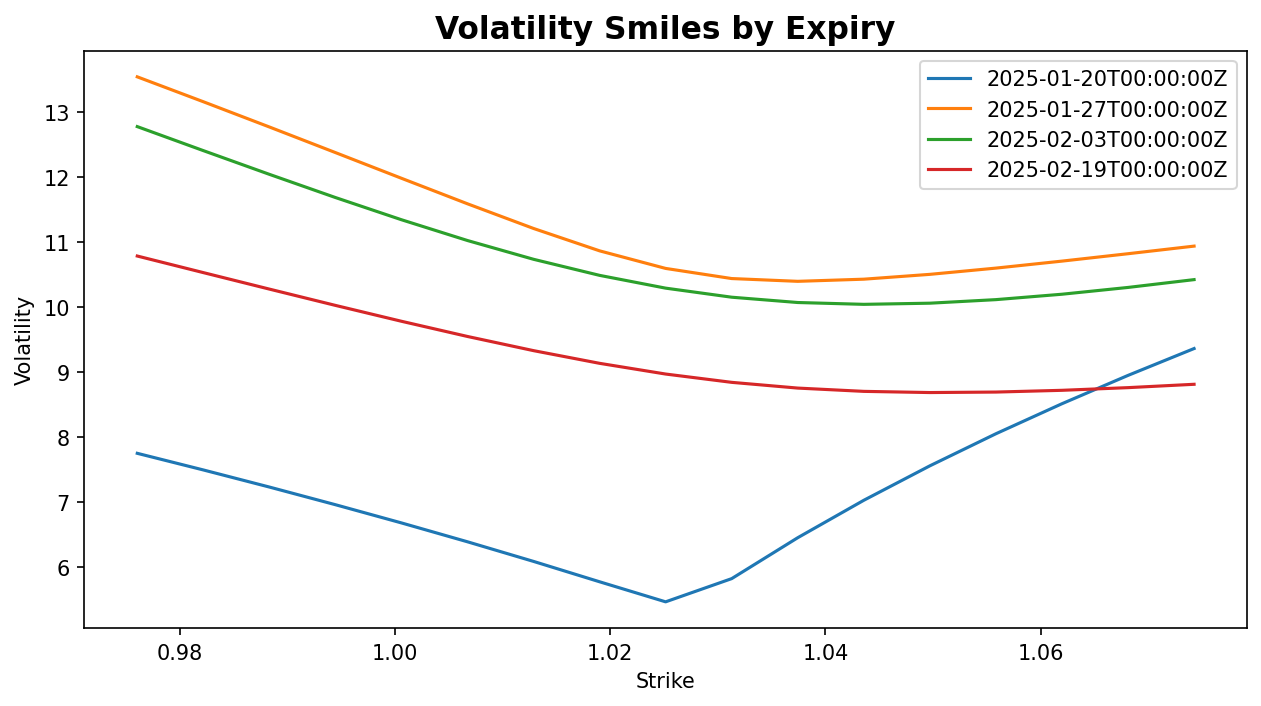

In [9]:
plt.figure()
plt.figure(figsize=(10, 5), dpi=150)
for tenor in list(surface_df.index)[0:4]:
    plt.plot(surface_df.columns, surface_df.T[tenor], label = tenor)
plt.title(f"Volatility Smiles by Expiry", fontdict={'fontweight':'bold','fontsize':15})
plt.legend(loc='upper right')
plt.xlabel('Strike')
plt.ylabel('Volatility')

## FX Volatility Surface - Moneyness

In [10]:
# Change X axis to use MONEYNESS
surface_parameters.x_axis = fxv.XAxisEnum.MONEYNESS
# Change Y axis to use TENOR
surface_parameters.y_axis = fxv.YAxisEnum.TENOR

In [11]:
# Execute the calculation using the calculate function
# The 'universe' parameter accepts a list of request items for batch processing
try:
    response = fxv.calculate(universe=[request_item])

    # Display response structure information
    surface_data = response['data'][0]
    if 'surface' in surface_data:
        print(f"   Calculation successful!")
        print(f"   Surface data points available: {len(surface_data['surface'])}")
    else:
        print("   No surface data found in response")
    
except Exception as e:
    print(f"   Calculation failed: {str(e)}")
    raise

   Calculation successful!
   Surface data points available: 18


In [12]:
vol_surface = response['data'][0]['surface']
expiries = vol_surface[0][1:]
moneyness_axis = []
values = []
for row in vol_surface[1:]:
    moneyness_axis.append(row[0])
    values.append(row[1:])

# Change ATM to O, more relevant for moneyness
moneyness_axis[moneyness_axis.index("ATM")] = 0

surface_df = pd.DataFrame(values, index=moneyness_axis, columns=expiries).T
display(surface_df.astype(float).round(2))

-10  -8.75   -7.5  -6.25     -5  -3.75   -2.5  -1.25      0   1.25  \
ON    9.64   9.09   8.71   8.22   7.70   7.15   6.57   5.94   5.44   6.86   
SW   16.45  15.59  15.00  14.24  13.46  12.65  11.82  11.03  10.52  10.41   
2W   15.74  14.85  14.24  13.47  12.70  11.93  11.21  10.61  10.22  10.05   
1M   12.82  12.21  11.79  11.27  10.73  10.20   9.69   9.23   8.89   8.72   
2M   11.67  11.18  10.85  10.43  10.00   9.57   9.15   8.77   8.42   8.25   
3M   11.00  10.61  10.35  10.01   9.67   9.33   8.99   8.64   8.24   8.07   
6M   10.55  10.19   9.96   9.66   9.35   9.05   8.75   8.44   7.96   7.90   
9M   10.61  10.24  10.00   9.69   9.39   9.08   8.78   8.49   7.94   7.99   
1Y   10.49  10.14   9.91   9.62   9.34   9.05   8.78   8.51   7.89   8.04   
2Y   10.20   9.94   9.76   9.55   9.34   9.14   8.95   8.76   8.03   8.41   
3Y   10.17   9.96   9.82   9.66   9.49   9.33   9.18   9.03   8.23   8.75   
5Y   10.22  10.07   9.97   9.84   9.72   9.60   9.49   9.38   8.47   9.16   
7Y   10.72  10.59  10.50  10.40  10.30  10.19  10.09   9.99   8.64   9.78   
10Y  10.63  10.54  10.47  10.40  10.32  10.25  10.18  10.11   8.91   9.97   

       2.5   3.75      5   6.25    7.5   8.75     10  
ON    7.95   8.90   9.74  10.52  11.23  11.76  12.50  
SW   10.58  10.81  11.05  11.30  11.55  11.74  12.02  
2W   10.10  10.29  10.55  10.85  11.16  11.42  11.80  
1M    8.69   8.76   8.87   9.01   9.16   9.29   9.48  
2M    8.16   8.12   8.12   8.14   8.16   8.19   8.23  
3M    7.94   7.88   7.85   7.83   7.82   7.81   7.81  
6M    7.71   7.58   7.51   7.46   7.44   7.42   7.40  
9M    7.79   7.65   7.55   7.49   7.45   7.43   7.42  
1Y    7.84   7.68   7.56   7.47   7.42   7.40   7.40  
2Y    8.25   8.11   7.99   7.88   7.79   7.73   7.66  
3Y    8.62   8.50   8.39   8.29   8.20   8.13   8.05  
5Y    9.06   8.97   8.88   8.79   8.71   8.65   8.57  
7Y    9.68   9.58   9.49   9.39   9.29   9.21   9.10  
10Y   9.90   9.83   9.76   9.70   9.63   9.58   9.51

Text(0, 0.5, 'Volatility')

<Figure size 640x480 with 0 Axes>

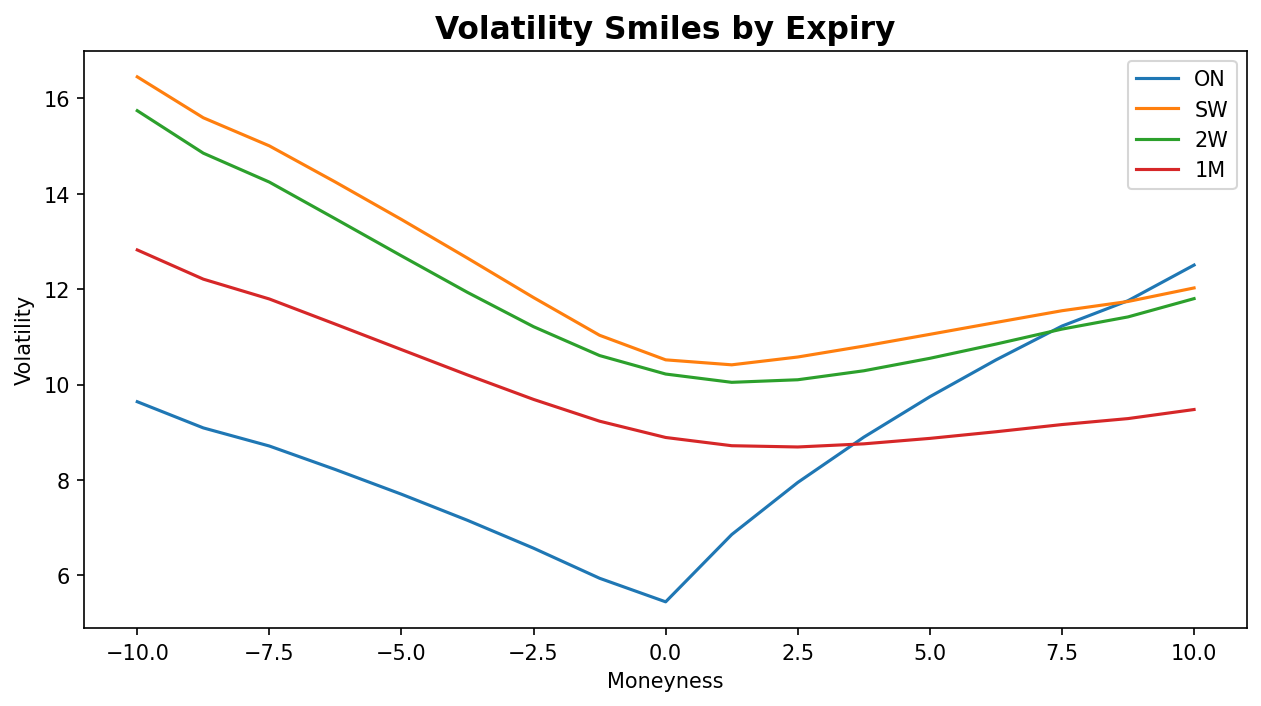

In [13]:
plt.figure()
plt.figure(figsize=(10, 5), dpi=150)
for tenor in list(surface_df.index)[0:4]:
    plt.plot(surface_df.columns.map(float), surface_df.T[tenor], label = tenor)
plt.title(f"Volatility Smiles by Expiry", fontdict={'fontweight':'bold','fontsize':15})
plt.legend(loc='upper right')
plt.xlabel('Moneyness')
plt.ylabel('Volatility')